# training demo for xgboost models

In [2]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

ModuleNotFoundError: No module named 'xgboost'

In [4]:
# load training data
Xtr_loadpath = 'Xtr.csv'
Xts_loadpath = 'Xts.csv'
ytr_loadpath = 'ytr.csv'

Xtr = np.loadtxt(Xtr_loadpath, delimiter=",")
Xts = np.loadtxt(Xts_loadpath, delimiter=",")
ytr = np.loadtxt(ytr_loadpath, delimiter=",")

In [5]:
# standardize the training data
Xtr_standardized = Xtr # revise this line as needed
Xts_standardized = Xts # revise this line as needed
ytr_standardized = ytr # revise this line as needed

# save the standardized training data
Xtr_savepath = 'Xtr_xgboost.csv'
Xts_savepath = 'Xts_xgboost.csv'
ytr_savepath = 'ytr_xgboost.csv'
yts_hat_savepath = 'yts_hat_xgboost.csv'

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized, delimiter=",")
np.savetxt(ytr_savepath, ytr_standardized, delimiter=",")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(Xtr_standardized, ytr_standardized, test_size=0.2, shuffle=True, random_state=42)

Baseline in demo, but demo is training only, no testing set.


In [8]:
# train a model
xg = XGBClassifier()
xg.fit(Xtr_standardized, ytr_standardized)

auc = roc_auc_score(ytr_standardized,xg.predict(Xtr_standardized,output_margin=True))
print('training auc: ',auc)

training auc:  0.9274124818538891


In [9]:
from sklearn.ensemble import RandomForestClassifier

# RF

Original RF, divide training and testing set. Testing auc is 91% already

In [10]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

auc = roc_auc_score(y_val,RFC.predict_proba(X_val)[:, 1])
print('val auc: ',auc)

val auc:  0.911367025219355


Increase estimators won't cause overfitting, so set it to 1000 first.

Val auc reaches 0.915


In [11]:
RFC = RandomForestClassifier(n_estimators=1000)
RFC.fit(X_train, y_train)

auc = roc_auc_score(y_val,RFC.predict_proba(X_val)[:, 1])
print('val auc: ',auc)

val auc:  0.9149837961765871


Try increase min_samples_split to reduce overfitting, scores go down.

In [12]:
RFC = RandomForestClassifier(n_estimators=1000, min_samples_split=20)
RFC.fit(X_train, y_train)

auc = roc_auc_score(y_val,RFC.predict_proba(X_val)[:, 1])
print('val auc: ',auc)

val auc:  0.9125618417196739


Change gini to entropy, scores increase little bit.

In [13]:
RFC = RandomForestClassifier(n_estimators=1000, min_samples_split=20, criterion='entropy')
RFC.fit(X_train, y_train)

auc = roc_auc_score(y_val,RFC.predict_proba(X_val)[:, 1])
print('val auc: ',auc)

val auc:  0.9141380514040439


Try setting max_features mannualy, not very helping.

In [14]:
RFC = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_features=6)
RFC.fit(X_train, y_train)

auc = roc_auc_score(y_val,RFC.predict_proba(X_val)[:, 1])
print('val auc: ',auc)

val auc:  0.9133688007446865


In [15]:
RFC = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_features=4)
RFC.fit(X_train, y_train)

auc = roc_auc_score(y_val,RFC.predict_proba(X_val)[:, 1])
print('val auc: ',auc)

val auc:  0.9137297236730964


# XGB

Original xgboost, divide training and testing, testing auc = 90.6%.

In [16]:
xg = XGBClassifier()
xg.fit(X_train, y_train)

auc = roc_auc_score(y_val,xg.predict(X_val,output_margin=True))
print('val auc: ',auc)

val auc:  0.9064396192101498


Lots of parameters need tuning, start from max_depth, set small learning rate and larger n_estimators, use early stop of avoid overfitting.

In [17]:
max_depth_list = [5, 7, 10, 12] 

In [18]:
for max_depth in max_depth_list:
    xg = XGBClassifier(max_depth=max_depth, n_estimators=1500, learning_rate=0.01)
    xg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric=['auc'],early_stopping_rounds=50)

    auc = roc_auc_score(y_val,xg.predict(X_val,output_margin=True))
    print('val auc: ',auc, max_depth)

[0]	validation_0-auc:0.87502	validation_1-auc:0.849367
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.875476	validation_1-auc:0.849328
[2]	validation_0-auc:0.875476	validation_1-auc:0.84937
[3]	validation_0-auc:0.876061	validation_1-auc:0.849516
[4]	validation_0-auc:0.888225	validation_1-auc:0.866284
[5]	validation_0-auc:0.888502	validation_1-auc:0.8666
[6]	validation_0-auc:0.890374	validation_1-auc:0.867454
[7]	validation_0-auc:0.891444	validation_1-auc:0.869295
[8]	validation_0-auc:0.891372	validation_1-auc:0.869341
[9]	validation_0-auc:0.893051	validation_1-auc:0.872111
[10]	validation_0-auc:0.894197	validation_1-auc:0.874261
[11]	validation_0-auc:0.893466	validation_1-auc:0.873877
[12]	validation_0-auc:0.895856	validation_1-auc:0.876493
[13]	validation_0-auc:0.897089	validation_1-auc:0.877453
[14]	validation_0-auc:0.896878	validation_1-auc:0.878061
[1

这个输出比较乱，需要手动翻着看下
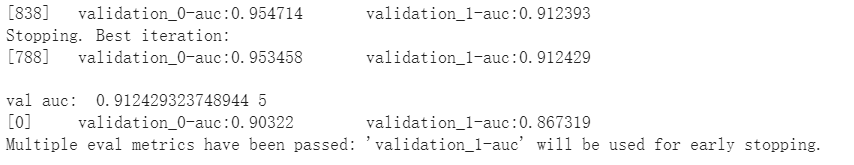
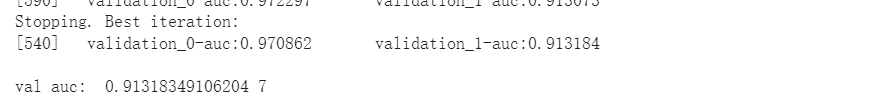

Highest score occurs when max_depth=7. Run it at 7, the score is close to RF, around 0.913.

In [19]:
xg = XGBClassifier(max_depth=7, n_estimators=600, learning_rate=0.01)
xg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric=['auc'],early_stopping_rounds=50)

auc = roc_auc_score(y_val,xg.predict(X_val,output_margin=True))
print('val auc: ',auc, max_depth)

[0]	validation_0-auc:0.90322	validation_1-auc:0.867319
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.903604	validation_1-auc:0.867468
[2]	validation_0-auc:0.904488	validation_1-auc:0.870212
[3]	validation_0-auc:0.90509	validation_1-auc:0.870806
[4]	validation_0-auc:0.905165	validation_1-auc:0.871414
[5]	validation_0-auc:0.906034	validation_1-auc:0.872566
[6]	validation_0-auc:0.905963	validation_1-auc:0.872579
[7]	validation_0-auc:0.9072	validation_1-auc:0.874206
[8]	validation_0-auc:0.907983	validation_1-auc:0.874429
[9]	validation_0-auc:0.908182	validation_1-auc:0.874399
[10]	validation_0-auc:0.908835	validation_1-auc:0.8759
[11]	validation_0-auc:0.911765	validation_1-auc:0.882214
[12]	validation_0-auc:0.913711	validation_1-auc:0.884451
[13]	validation_0-auc:0.914479	validation_1-auc:0.885325
[14]	validation_0-auc:0.915357	validation_1-auc:0.886609
[15]

# feature selection

Print out features' importance


In [20]:
RFC.feature_importances_

array([0.05699298, 0.05632028, 0.18942087, 0.09998241, 0.05526135,
       0.15659585, 0.14005948, 0.24536677])

In [21]:
xg.feature_importances_

array([0.03494326, 0.03497754, 0.23310032, 0.07657692, 0.03000966,
       0.10832622, 0.11253327, 0.36953285], dtype=float32)

delete 1st, 2nd and 4th. as their scores are low.


In [22]:
X_train_xg = X_train[:, [2,3,5,6,7]]
X_val_xg = X_val[:, [2,3,5,6,7]]

val auc increases!

In [23]:
for max_depth in max_depth_list:
    xg = XGBClassifier(max_depth=max_depth, n_estimators=1500, learning_rate=0.01)
    xg.fit(X_train_xg, y_train, eval_set=[(X_train_xg, y_train), (X_val_xg, y_val)], eval_metric=['auc'],early_stopping_rounds=50)

    auc = roc_auc_score(y_val,xg.predict(X_val_xg,output_margin=True))
    print('val auc: ',auc, max_depth)

[0]	validation_0-auc:0.874936	validation_1-auc:0.849405
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.875379	validation_1-auc:0.849349
[2]	validation_0-auc:0.875381	validation_1-auc:0.849389
[3]	validation_0-auc:0.875994	validation_1-auc:0.849429
[4]	validation_0-auc:0.888143	validation_1-auc:0.866296
[5]	validation_0-auc:0.888428	validation_1-auc:0.866611
[6]	validation_0-auc:0.890326	validation_1-auc:0.867428
[7]	validation_0-auc:0.891383	validation_1-auc:0.8693
[8]	validation_0-auc:0.891323	validation_1-auc:0.869345
[9]	validation_0-auc:0.892994	validation_1-auc:0.872114
[10]	validation_0-auc:0.894129	validation_1-auc:0.874264
[11]	validation_0-auc:0.893362	validation_1-auc:0.873666
[12]	validation_0-auc:0.895816	validation_1-auc:0.876372
[13]	validation_0-auc:0.897053	validation_1-auc:0.877328
[14]	validation_0-auc:0.896839	validation_1-auc:0.877925


In [24]:
xg = XGBClassifier(max_depth=7, n_estimators=900, learning_rate=0.01)
xg.fit(X_train_xg, y_train, eval_set=[(X_train_xg, y_train), (X_val_xg, y_val)], eval_metric=['auc'],early_stopping_rounds=50)

auc = roc_auc_score(y_val,xg.predict(X_val_xg,output_margin=True))
print('val auc: ',auc, max_depth)

[0]	validation_0-auc:0.902962	validation_1-auc:0.868317
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.903283	validation_1-auc:0.868843
[2]	validation_0-auc:0.904214	validation_1-auc:0.871368
[3]	validation_0-auc:0.904887	validation_1-auc:0.872024
[4]	validation_0-auc:0.90501	validation_1-auc:0.872107
[5]	validation_0-auc:0.90584	validation_1-auc:0.873178
[6]	validation_0-auc:0.905822	validation_1-auc:0.873028
[7]	validation_0-auc:0.906999	validation_1-auc:0.874743
[8]	validation_0-auc:0.907828	validation_1-auc:0.874974
[9]	validation_0-auc:0.908074	validation_1-auc:0.874926
[10]	validation_0-auc:0.908578	validation_1-auc:0.875988
[11]	validation_0-auc:0.911482	validation_1-auc:0.881991
[12]	validation_0-auc:0.913176	validation_1-auc:0.884271
[13]	validation_0-auc:0.914042	validation_1-auc:0.885222
[14]	validation_0-auc:0.915254	validation_1-auc:0.88664
[

In [25]:
RFC = RandomForestClassifier()
RFC.fit(X_train_xg, y_train)

auc = roc_auc_score(y_val,RFC.predict_proba(X_val_xg)[:, 1])
print('val auc: ',auc)

val auc:  0.9133445596524796


In [26]:
RFC = RandomForestClassifier(n_estimators=1000)
RFC.fit(X_train_xg, y_train)

auc = roc_auc_score(y_val,RFC.predict_proba(X_val_xg)[:, 1])
print('val auc: ',auc)

val auc:  0.9159965351398873


# final model

Use all data to train.

In [27]:
Xtr_standardized = Xtr[:, [2,3,5,6,7]] # revise this line as needed
Xts_standardized = Xts[:, [2,3,5,6,7]] # revise this line as needed
ytr_standardized = ytr # revise this line as needed

# save the standardized training data
Xtr_savepath = 'Xtr_xgboost.csv'
Xts_savepath = 'Xts_xgboost.csv'
ytr_savepath = 'ytr_xgboost.csv'
yts_hat_savepath = 'yts_hat_xgboost.csv'

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xts_savepath, Xts_standardized, delimiter=",")
np.savetxt(ytr_savepath, ytr_standardized, delimiter=",")

In [28]:
xg = XGBClassifier(max_depth=7, n_estimators=900, learning_rate=0.01)
xg.fit(Xtr_standardized, ytr_standardized)

XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=900)

In [29]:
# save the model: you must use the .json format for xgboost models!
model_savepath = 'xg.json'
xg.save_model(model_savepath)

In [30]:
# generate kaggle submission file using the validation script
!python {"validation.py " + model_savepath + " --Xts_path " + Xts_savepath + " --Xtr_path " + Xtr_savepath + " --yts_hat_path " + yts_hat_savepath }

training auc =  0.9697308244162719
test label confidences saved in yts_hat_xgboost.csv


In [1]:
RFC = RandomForestClassifier(n_estimators=1000)
RFC.fit(Xtr_standardized, ytr_standardized)



NameError: name 'RandomForestClassifier' is not defined

这个RF的test auc就是提交上去的是0.92118，之前那次提交的没用全部数据集训练，分数第0.03.

In [32]:
yts_hat_savepath = 'yts_hat_rf.csv'

In [33]:
import pickle
import bz2
# save the model: you must use the .bz2 format for sklearn models!
model_savepath = 'rfc.bz2'
with bz2.BZ2File(model_savepath, 'w') as f:
    pickle.dump(RFC,f)

In [34]:
# generate kaggle submission file using the validation script
!python {"validation.py " + model_savepath + " --Xts_path " + Xts_savepath + " --Xtr_path " + Xtr_savepath + " --yts_hat_path " + yts_hat_savepath } 

training auc =  1.0
test label confidences saved in yts_hat_rf.csv


这个xgboost的test auc就是提交上去的是0.92047，之前那次提交的没用全部数据集训练，分数第0.03.